<a href="https://colab.research.google.com/github/MelisaCHasan/MAT461/blob/main/Module_B_Part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Write a function my_lagrange(x, y, X), where the output Y is the Lagrange interpolation of the data points contained in x and y computed at X. Hint: Use a nested for-loop, where the inner for-loop computes the product for the Lagrange basis polynomial and the outer loop computes the sum for the Lagrange polynomial. Don’t use the existing lagrange function from scipy.

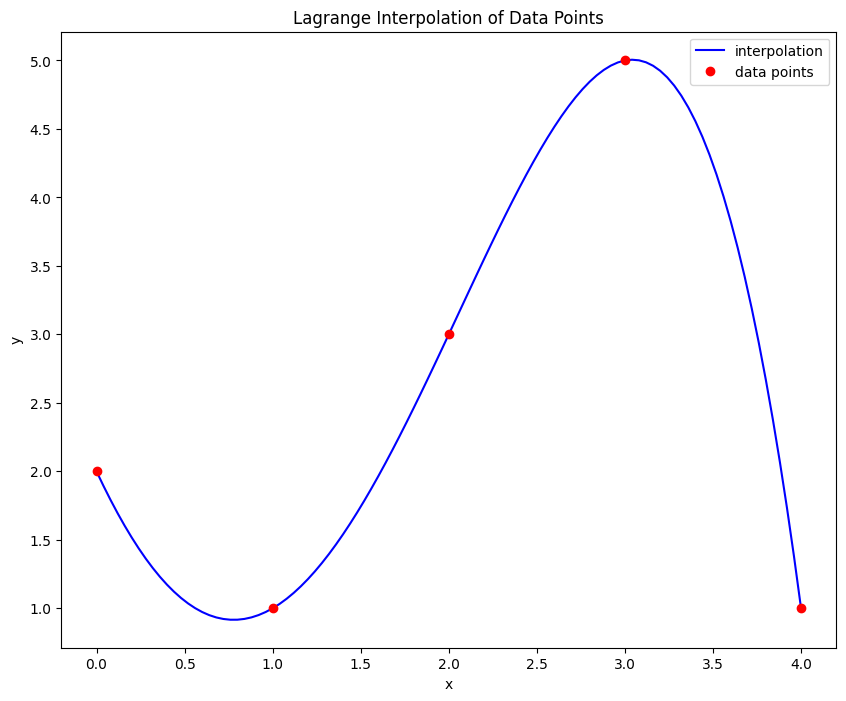

In [26]:
import numpy as np
import matplotlib.pyplot as plt

def my_lagrange(x, y, X):
  Y = 0
  length = len(x)
  for i in range(length):
    P = 1
    for j in range(length):
      if i != j:
        Px = X-x[j]
        Dx = x[i]-x[j]
        P = P*Px/Dx
    Y = y[i]*P+Y
  return Y

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

X = np.linspace(0, 4, 101)

plt.figure(figsize = (10,8 ))
plt.plot(X, my_lagrange(x, y, X), 'b', label = 'interpolation')
plt.plot(x, y, 'ro', label = 'data points')

plt.xlabel('x')
plt.ylabel('y')

plt.title(f'Lagrange Interpolation of Data Points')
plt.legend()
plt.show()

Fit the data x = [0, 1, 2, 3, 4], y = [2, 1, 3, 5, 1] using Newton’s polynomial interpolation.


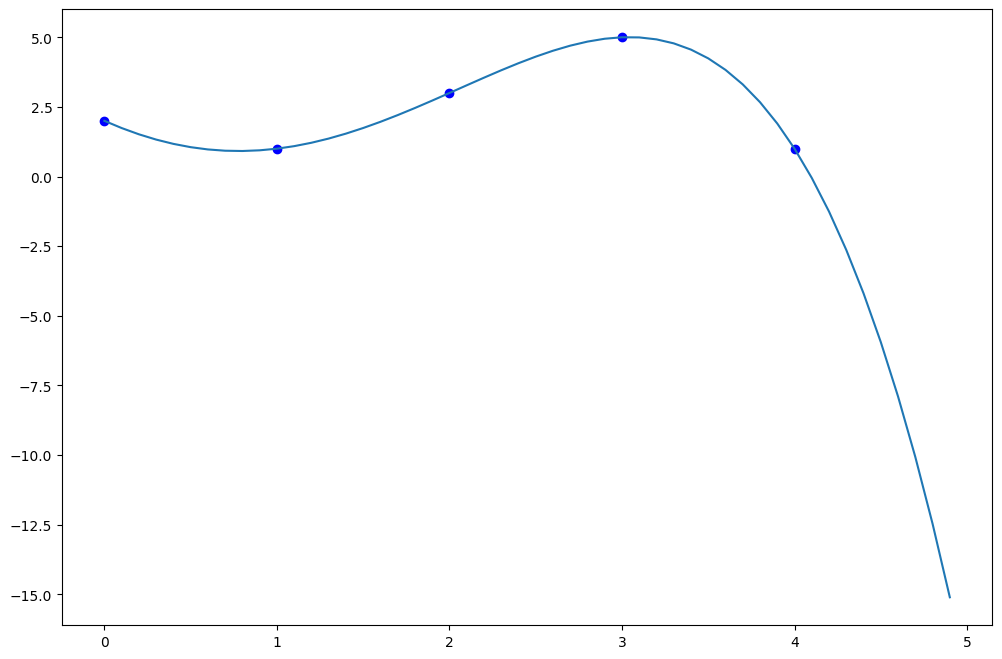

In [28]:
import numpy as np
import matplotlib.pyplot as plt

def divided_diff(x, y):
    '''
    function to calculate the divided
    differences table
    '''
    n = len(y)
    coef = np.zeros([n, n])
    # the first column is y
    coef[:,0] = y

    for j in range(1,n):
        for i in range(n-j):
            coef[i][j] = \
           (coef[i+1][j-1] - coef[i][j-1]) / (x[i+j]-x[i])

    return coef

def newton_poly(coef, x_data, x):
    '''
    evaluate the newton polynomial
    at x
    '''
    n = len(x_data) - 1
    p = coef[n]
    for k in range(1,n+1):
        p = coef[n-k] + (x -x_data[n-k])*p
    return p

x = [0, 1, 2, 3, 4]
y = [2, 1, 3, 5, 1]

a_s = divided_diff(x, y)[0, :]

x_new = np.arange(0, 5, .1)
y_new = newton_poly(a_s, x, x_new)

plt.figure(figsize = (12, 8))
plt.plot(x, y, 'bo')
plt.plot(x_new, y_new)